<a href="https://colab.research.google.com/github/arturodeleon19/Tensorflow_Images/blob/main/Popular_Street_Foods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nikolasgegenava/popular-street-foods")

print("Path to dataset files:", path)

100%|██████████| 18.6M/18.6M [00:00<00:00, 155MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nikolasgegenava/popular-street-foods/versions/1


In [ ]:
import os
import random
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras import layers, models, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:


def count_directory_contents(root_path):
    dir_count = 0
    file_count = 0
    image_count = 0

    # Common image file extensions
    image_extensions = {'.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp'}

    for root, dirs, files in os.walk(root_path):
        dir_count += len(dirs)
        file_count += len(files)

        for file in files:
            if Path(file).suffix.lower() in image_extensions:
                image_count += 1

    return dir_count, file_count, image_count

# Specify the path to analyze
path_to_analyze = "/root/.cache/kagglehub/datasets/nikolasgegenava/popular-street-foods/versions/1"

try:
    dirs, files, images = count_directory_contents(path_to_analyze)

    print(f"Directory analysis for: {path_to_analyze}")
    print(f"Total directories: {dirs}")
    print(f"Total files: {files}")
    print(f"Total image files: {images}")

except FileNotFoundError:
    print(f"Error: The specified path does not exist: {path_to_analyze}")
except PermissionError:
    print(f"Error: Permission denied when accessing: {path_to_analyze}")
except Exception as e:
    print(f"An unexpected error occurred: {str(e)}")

Directory analysis for: /root/.cache/kagglehub/datasets/nikolasgegenava/popular-street-foods/versions/1
Total directories: 22
Total files: 3675
Total image files: 3674


In [ ]:
path = "/root/.cache/kagglehub/datasets/nikolasgegenava/popular-street-foods/versions/1/popular_street_foods/dataset"
print(os.listdir(path))
for item in os.listdir(path):
    print(f"{item}: {os.path.isdir(os.path.join(path, item))}")

['burger', 'pretzel', 'arepas', 'fish_and_chips', 'bánh_mì', 'currywurst', 'falafel', 'hot_dog', 'pad_thai', 'tacos', 'samosas', 'empanadas', 'crepes', 'shawarma', 'pizza_slice', 'gelato', 'poutine', 'churros', 'pani_puri', 'kebab_(shish_kebab)']
burger: True
pretzel: True
arepas: True
fish_and_chips: True
bánh_mì: True
currywurst: True
falafel: True
hot_dog: True
pad_thai: True
tacos: True
samosas: True
empanadas: True
crepes: True
shawarma: True
pizza_slice: True
gelato: True
poutine: True
churros: True
pani_puri: True
kebab_(shish_kebab): True


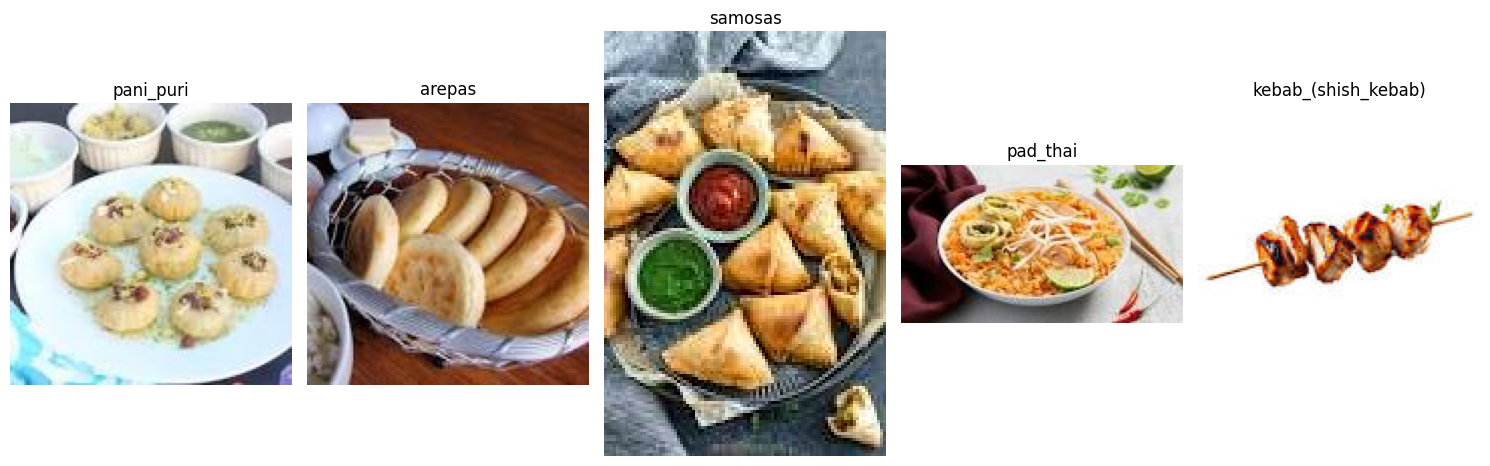

In [ ]:

def display_random_images(dataset_path, num_images=5):
    # Supported image extensions
    image_extensions = {'.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp'}

    # Collect all image paths with their class (directory name)
    image_paths = []
    for root, dirs, files in os.walk(dataset_path):
        current_class = os.path.basename(root)
        for file in files:
            if Path(file).suffix.lower() in image_extensions:
                full_path = os.path.join(root, file)
                image_paths.append((full_path, current_class))

    if not image_paths:
        print("No images found in the specified directory.")
        return

    # Randomly select images
    selected_images = random.sample(image_paths, min(num_images, len(image_paths)))

    # Display the images
    plt.figure(figsize=(15, 10))
    for i, (img_path, img_class) in enumerate(selected_images, 1):
        try:
            img = mpimg.imread(img_path)
            plt.subplot(1, num_images, i)
            plt.imshow(img)
            plt.title(img_class)
            plt.axis('off')
        except Exception as e:
            print(f"Error loading image {img_path}: {str(e)}")

    plt.tight_layout()
    plt.show()

# Path to your dataset
dataset_path = "/root/.cache/kagglehub/datasets/nikolasgegenava/popular-street-foods/versions/1/popular_street_foods/dataset"

# Display 5 random images
try:
    display_random_images(dataset_path, 5)
except FileNotFoundError:
    print(f"Error: The specified path does not exist: {dataset_path}")
except PermissionError:
    print(f"Error: Permission denied when accessing: {dataset_path}")
except Exception as e:
    print(f"An unexpected error occurred: {str(e)}")

Found 3674 files belonging to 20 classes.
Using 2940 files for training.
Found 3674 files belonging to 20 classes.
Using 734 files for validation.
Found 20 classes: ['arepas', 'burger', 'bánh_mì', 'churros', 'crepes', 'currywurst', 'empanadas', 'falafel', 'fish_and_chips', 'gelato', 'hot_dog', 'kebab_(shish_kebab)', 'pad_thai', 'pani_puri', 'pizza_slice', 'poutine', 'pretzel', 'samosas', 'shawarma', 'tacos']
Training dataset batches: 92
Validation dataset batches: 23


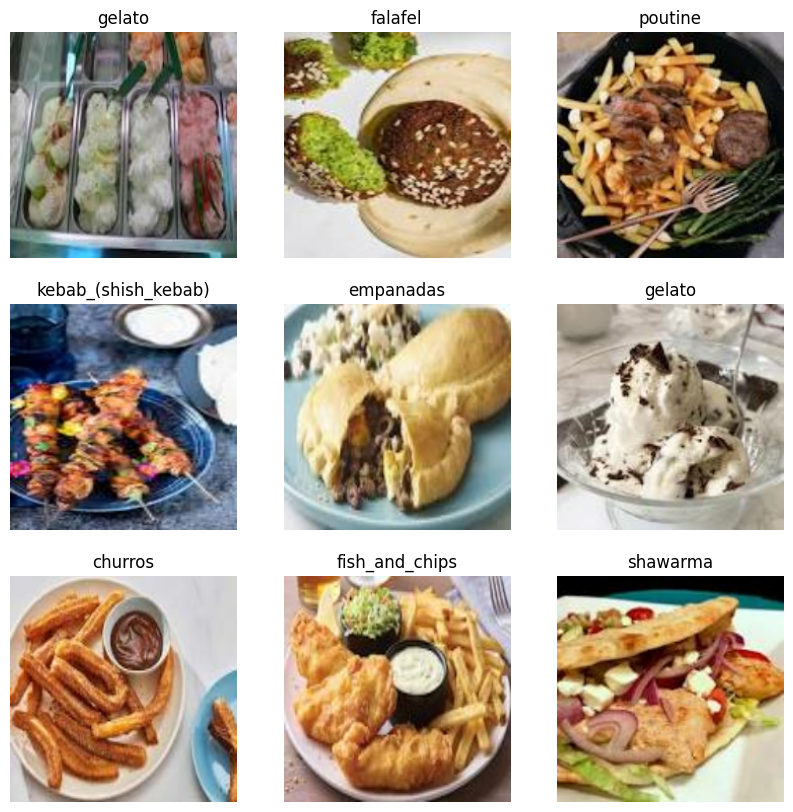

In [ ]:
# Dataset path
dataset_path = "/root/.cache/kagglehub/datasets/nikolasgegenava/popular-street-foods/versions/1/popular_street_foods/dataset"

## Create TensorFlow Dataset
def create_tf_datasets(data_dir, img_size=(224, 224), batch_size=32, val_split=0.2):
    # Create training dataset
    train_ds = image_dataset_from_directory(
        data_dir,
        validation_split=val_split,
        subset="training",
        seed=123,
        image_size=img_size,
        batch_size=batch_size,
        label_mode="categorical"
    )

    # Create validation dataset
    val_ds = image_dataset_from_directory(
        data_dir,
        validation_split=val_split,
        subset="validation",
        seed=123,
        image_size=img_size,
        batch_size=batch_size,
        label_mode="categorical"
    )

    # Get class names
    class_names = train_ds.class_names

    return train_ds, val_ds, class_names

try:
    # Create datasets
    train_dataset, val_dataset, class_names = create_tf_datasets(dataset_path)

    print(f"Found {len(class_names)} classes: {class_names}")
    print(f"Training dataset batches: {len(train_dataset)}")
    print(f"Validation dataset batches: {len(val_dataset)}")

    # Visualize some samples
    plt.figure(figsize=(10, 10))
    for images, labels in train_dataset.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(class_names[tf.argmax(labels[i])])
            plt.axis("off")
    plt.show()

    # Configure datasets for performance
    AUTOTUNE = tf.data.AUTOTUNE
    train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
    val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)

except Exception as e:
    print(f"Error creating datasets: {str(e)}")

In [ ]:
# Verify datasets
print(f"Training dataset batches: {len(train_dataset)}")
print(f"Validation dataset batches: {len(val_dataset)}")
print(f"Class names: {class_names}")

# Model configuration
INPUT_SHAPE = (224, 224, 3)
NUM_CLASSES = 20
DROPOUT_RATE = 0.5
L2_REG = 0.001
INITIAL_LR = 0.001

def build_deep_model(input_shape, num_classes):
    """Build a deep CNN with regularization"""
    model = models.Sequential([
        # Input layer
        layers.InputLayer(input_shape=input_shape),

        # First convolutional block
        layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=regularizers.l2(L2_REG)),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(DROPOUT_RATE/2),

        # Second convolutional block
        layers.Conv2D(128, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=regularizers.l2(L2_REG)),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(DROPOUT_RATE),

        # Third convolutional block (deeper)
        layers.Conv2D(256, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=regularizers.l2(L2_REG)),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(DROPOUT_RATE),

        # Fourth convolutional block
        layers.Conv2D(512, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=regularizers.l2(L2_REG)),
        layers.BatchNormalization(),
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(DROPOUT_RATE),

        # Flatten and dense layers
        layers.Flatten(),
        layers.Dense(1024, activation='relu',
                   kernel_regularizer=regularizers.l2(L2_REG)),
        layers.BatchNormalization(),
        layers.Dropout(DROPOUT_RATE),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(DROPOUT_RATE),

        # Output layer
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

# Build model
model = build_deep_model(INPUT_SHAPE, NUM_CLASSES)

# Compile with Adam optimizer
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=INITIAL_LR),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)


# Training parameters
EPOCHS = 50

# Train the model
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=EPOCHS,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model
print("\nEvaluating model on validation set...")
val_loss, val_acc = model.evaluate(val_dataset)
print(f"Final Validation Accuracy: {val_acc:.4f}")
print(f"Final Validation Loss: {val_loss:.4f}")


Training dataset batches: 92
Validation dataset batches: 23
Class names: ['arepas', 'burger', 'bánh_mì', 'churros', 'crepes', 'currywurst', 'empanadas', 'falafel', 'fish_and_chips', 'gelato', 'hot_dog', 'kebab_(shish_kebab)', 'pad_thai', 'pani_puri', 'pizza_slice', 'poutine', 'pretzel', 'samosas', 'shawarma', 'tacos']
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


92/92 ━━━━━━━━━━━━━━━━━━━━ 32s 182ms/step - accuracy: 0.0617 - loss: 9.1916 - val_accuracy: 0.0259 - val_loss: 21.5892 - learning_rate: 0.0010
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.0841 - loss: 10.3889 - val_accuracy: 0.1117 - val_loss: 9.0873 - learning_rate: 0.0010
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.1266 - loss: 8.8262 - val_accuracy: 0.1948 - val_loss: 7.5157 - learning_rate: 0.0010
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.1505 - loss: 7.6428 - val_accuracy: 0.0967 - val_loss: 7.7900 - learning_rate: 0.0010
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.1873 - loss: 7.1355 - val_accuracy: 0.2262 - val_loss: 6.4775 - learning_rate: 0.0010
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.2305 - loss: 6.5709 - val_accuracy: 0.2670 - val_loss: 6.1390 - learning_rate: 0.0010
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.2290 - loss: 6.2877 - val_accuracy: 


Evaluating model on validation set...
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3575 - loss: 4.0158
Final Validation Accuracy: 0.3501
Final Validation Loss: 4.0322


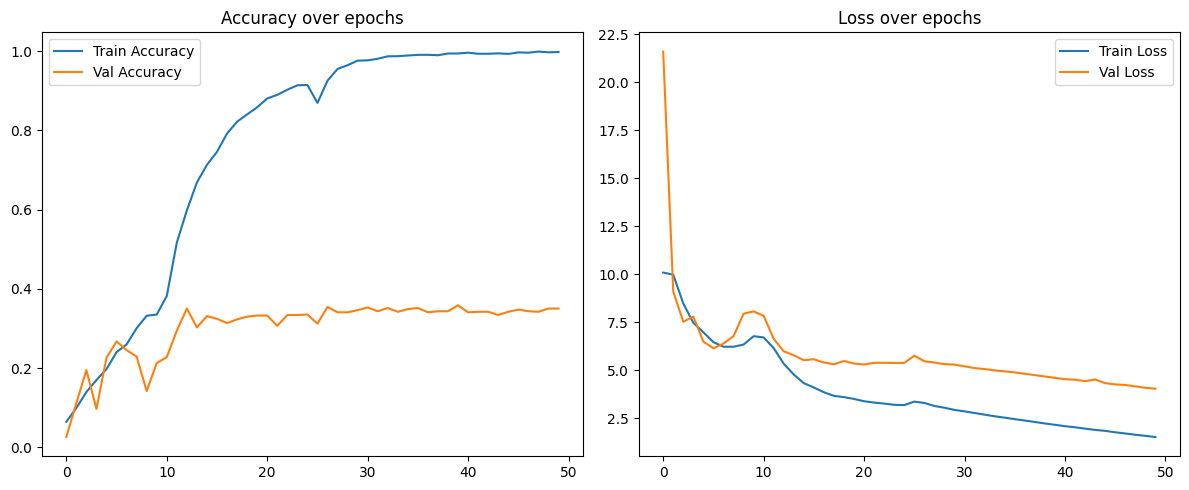

In [ ]:
# Evaluate the model
print("\nEvaluating model on validation set...")
val_loss, val_acc = model.evaluate(val_dataset)
print(f"Final Validation Accuracy: {val_acc:.4f}")
print(f"Final Validation Loss: {val_loss:.4f}")

# Plot training history
def plot_history(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy over epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss over epochs')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)


In [ ]:
# Verify datasets
print(f"Training dataset batches: {len(train_dataset)}")
print(f"Validation dataset batches: {len(val_dataset)}")
print(f"Class names: {class_names}")

# Model configuration
INPUT_SHAPE = (224, 224, 3)
NUM_CLASSES = 20
DROPOUT_RATE = 0.5
L2_REG = 0.001
INITIAL_LR = 0.001

def build_deep_model(input_shape, num_classes):
    """Build a deep CNN with regularization"""
    model = models.Sequential([
        # Input layer
        layers.InputLayer(input_shape=input_shape),

        # Augmentation (only active during training)
        layers.RandomFlip("horizontal_and_vertical"),
        layers.RandomRotation(0.15),  # ±15% rotation
        layers.RandomZoom(0.1),       # ±10% zoom
        layers.RandomContrast(0.1),   # ±10% contrast variation
        layers.RandomTranslation(0.1, 0.1),  # ±10% translation

        # First convolutional block
        layers.Conv2D(64, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=regularizers.l2(L2_REG)),
        layers.BatchNormalization(),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(DROPOUT_RATE/2),

        # Second convolutional block
        layers.Conv2D(128, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=regularizers.l2(L2_REG)),
        layers.BatchNormalization(),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(DROPOUT_RATE),

        # Third convolutional block (deeper)
        layers.Conv2D(256, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=regularizers.l2(L2_REG)),
        layers.BatchNormalization(),
        layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(DROPOUT_RATE),

        # Fourth convolutional block
        layers.Conv2D(512, (3, 3), activation='relu', padding='same',
                     kernel_regularizer=regularizers.l2(L2_REG)),
        layers.BatchNormalization(),
        layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),
        layers.Dropout(DROPOUT_RATE),

        # Flatten and dense layers
        layers.Flatten(),
        layers.Dense(1024, activation='relu',
                   kernel_regularizer=regularizers.l2(L2_REG)),
        layers.BatchNormalization(),
        layers.Dropout(DROPOUT_RATE),
        layers.Dense(512, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(DROPOUT_RATE),

        # Output layer
        layers.Dense(num_classes, activation='softmax')
    ])

    return model

# Build model
model_2 = build_deep_model(INPUT_SHAPE, NUM_CLASSES)

# Compile with Adam optimizer
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=INITIAL_LR),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)


# Training parameters
EPOCHS = 50

# Train the model
history_2 = model_2.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=EPOCHS,
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model
print("\nEvaluating model on validation set...")
val_loss, val_acc = model.evaluate(val_dataset)
print(f"Final Validation Accuracy: {val_acc:.4f}")
print(f"Final Validation Loss: {val_loss:.4f}")


Training dataset batches: 92
Validation dataset batches: 23
Class names: ['arepas', 'burger', 'bánh_mì', 'churros', 'crepes', 'currywurst', 'empanadas', 'falafel', 'fish_and_chips', 'gelato', 'hot_dog', 'kebab_(shish_kebab)', 'pad_thai', 'pani_puri', 'pizza_slice', 'poutine', 'pretzel', 'samosas', 'shawarma', 'tacos']
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


92/92 ━━━━━━━━━━━━━━━━━━━━ 21s 133ms/step - accuracy: 0.0673 - loss: 8.9826 - val_accuracy: 0.0613 - val_loss: 64.6444 - learning_rate: 0.0010
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 124ms/step - accuracy: 0.0873 - loss: 10.2550 - val_accuracy: 0.0627 - val_loss: 22.8734 - learning_rate: 0.0010
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 124ms/step - accuracy: 0.1135 - loss: 8.6370 - val_accuracy: 0.1471 - val_loss: 7.8057 - learning_rate: 0.0010
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 124ms/step - accuracy: 0.1151 - loss: 7.4260 - val_accuracy: 0.1485 - val_loss: 6.6028 - learning_rate: 0.0010
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 124ms/step - accuracy: 0.1375 - loss: 6.6127 - val_accuracy: 0.1962 - val_loss: 5.7860 - learning_rate: 0.0010
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 121ms/step - accuracy: 0.1679 - loss: 5.9880 - val_accuracy: 0.1649 - val_loss: 6.0846 - learning_rate: 0.0010
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 11s 121ms/step - accuracy: 0.1838 - loss: 5.7886 - v


Evaluating model on validation set...
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4633 - loss: 2.8738
Final Validation Accuracy: 0.4496
Final Validation Loss: 2.8822


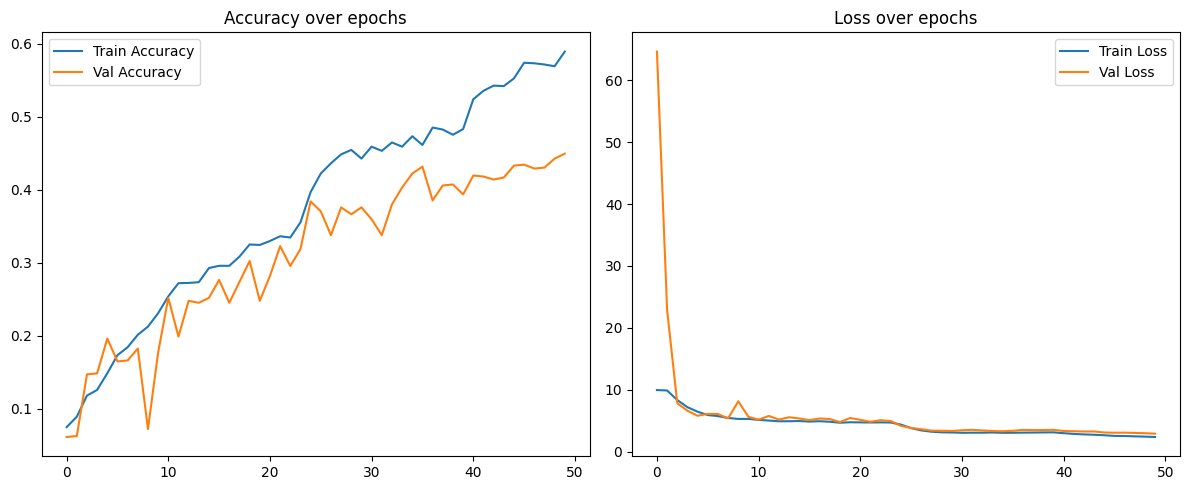

In [ ]:
# Evaluate the model
print("\nEvaluating model on validation set...")
val_loss, val_acc = model_2.evaluate(val_dataset)
print(f"Final Validation Accuracy: {val_acc:.4f}")
print(f"Final Validation Loss: {val_loss:.4f}")
plot_history(history_2)

In [ ]:
# Configuration
INPUT_SHAPE = (224, 224, 3)
NUM_CLASSES = 20
DROPOUT_RATE = 0.5
INITIAL_LR = 0.001
EPOCHS = 50

# Data augmentation layer (will be part of the model)
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.15),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
    layers.RandomTranslation(0.1, 0.1),
], name="data_augmentation")

def build_efficientnet_model(input_shape, num_classes):
    """Build EfficientNetB0 model with augmentation and custom head"""
    # Base model (pre-trained on ImageNet)
    base_model = EfficientNetB0(
        include_top=False,
        weights='imagenet',
        input_shape=input_shape,
        pooling='avg'
    )
    base_model.trainable = False  # Freeze base model initially

    # Build full model
    inputs = layers.Input(shape=input_shape)
    x = data_augmentation(inputs)
    x = tf.keras.applications.efficientnet.preprocess_input(x)
    x = base_model(x, training=False)
    x = layers.Dropout(DROPOUT_RATE)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model_3 = tf.keras.Model(inputs, outputs)

    return model_3, base_model

# Build model
model_3, base_model = build_efficientnet_model(INPUT_SHAPE, NUM_CLASSES)

# Compile model
model_3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=INITIAL_LR),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Callbacks
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss'),
    ReduceLROnPlateau(factor=0.2, patience=5, min_lr=1e-6, monitor='val_loss'),

]

# Train the model
history_3 = model_3.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=EPOCHS,
    callbacks=callbacks
)

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 17s 63ms/step - accuracy: 0.1667 - loss: 2.7827 - val_accuracy: 0.6213 - val_loss: 1.6174 - learning_rate: 0.0010
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.4956 - loss: 1.7726 - val_accuracy: 0.6935 - val_loss: 1.2157 - learning_rate: 0.0010
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.5966 - loss: 1.4163 - val_accuracy: 0.7125 - val_loss: 1.0342 - learning_rate: 0.0010
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.6287 - loss: 1.2784 - val_accuracy: 0.7316 - val_loss: 0.9393 - learning_rate: 0.0010
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.6565 - loss: 1.1636 - val_accuracy: 0.7411 - val_loss: 0.8812 - learning_rate: 0.0010
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.6624 - loss: 1.1103 - val_accuracy: 0.7384 - val_loss: 0.8414 - learning_rate: 0.0010
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 2


Evaluating model on validation set...
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.7699 - loss: 0.6805
Final Validation Accuracy: 0.7929
Final Validation Loss: 0.6220


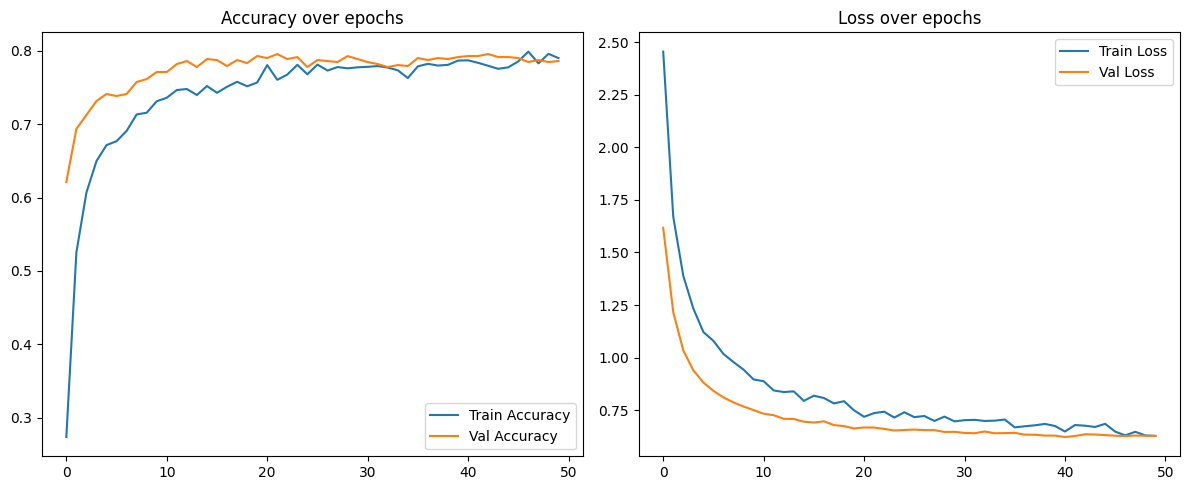

In [ ]:
# Evaluate the model
print("\nEvaluating model on validation set...")
val_loss, val_acc = model_3.evaluate(val_dataset)
print(f"Final Validation Accuracy: {val_acc:.4f}")
print(f"Final Validation Loss: {val_loss:.4f}")
plot_history(history_3)